# Analyzing AI Usage by Students

This project looks at the "AI Assistant Usage in Student Life" dataset, created by Ayesha Saleem, found on Kaggle

We will be answering the following questions:
1. Determining what affects the student's satisfaction with the AI.
2. Can a students likelyhood of reusing the AI be predicted?

## Initial Analysis

In [1]:
## Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Data
file_path = r"C:\Users\lpenn\OneDrive\Desktop\Data_Science_Projects\Datasets\ai_assistant_usage_student_life.csv"
Student_Data = pd.read_csv(file_path, index_col = False)

## Dropping SessionID and Session Date, since it will not be useful.
Student_Data.drop(columns=['SessionID', 'SessionDate'], inplace = True)

## Removing any duplicates
Student_Data.drop_duplicates()

display(Student_Data.head())
display(Student_Data.tail())

,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,Undergraduate,Computer Science,31.20,11,Studying,2,Assignment Completed,True,1.0
1,Undergraduate,Psychology,13.09,6,Studying,3,Assignment Completed,True,2.0
2,Undergraduate,Business,19.22,5,Coding,3,Assignment Completed,True,3.3
3,Undergraduate,Computer Science,3.70,1,Coding,3,Assignment Completed,True,3.5
4,Undergraduate,Psychology,28.12,9,Writing,3,Assignment Completed,True,2.9


,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
9995,Undergraduate,Psychology,28.41,5,Studying,3,Assignment Completed,True,4.2
9996,High School,Business,13.98,6,Writing,5,Assignment Completed,True,5.0
9997,Undergraduate,Biology,10.78,2,Studying,3,Idea Drafted,True,3.5
9998,Undergraduate,Business,30.88,7,Writing,3,Assignment Completed,False,4.3
9999,Undergraduate,Math,10.85,3,Writing,4,Assignment Completed,True,4.9


In [2]:
Student_Data.isnull().sum()

StudentLevel          0
Discipline            0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

No null values

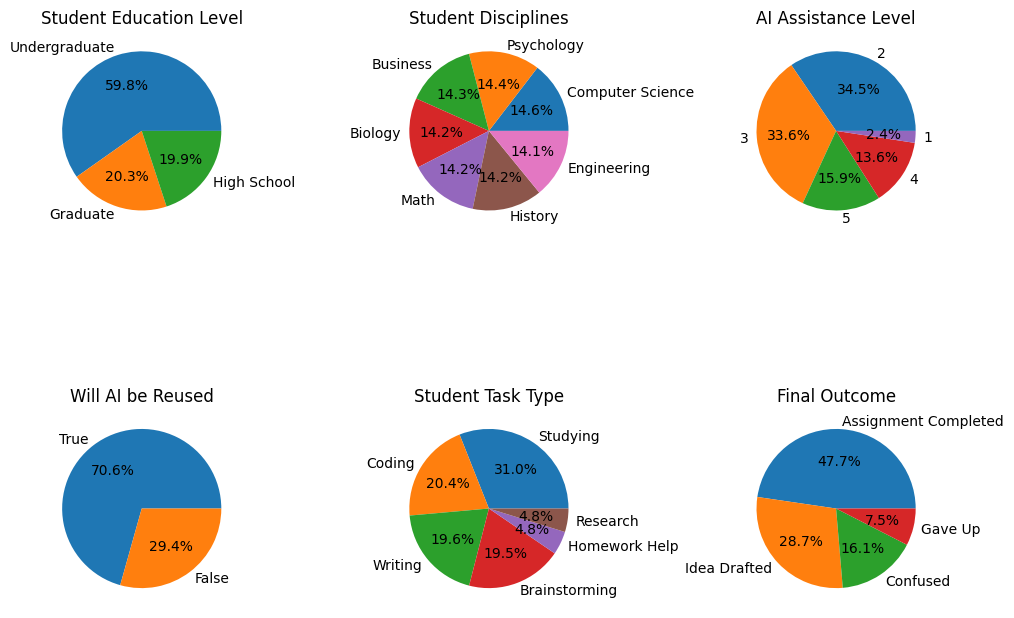

In [3]:
## Plotting the data distribution of important columns
figure, axis = plt.subplots(2,3, figsize = (10,8))

axis[0,0].pie(Student_Data['StudentLevel'].value_counts(), labels = Student_Data['StudentLevel'].unique(), autopct = '%1.1f%%')
axis[0,0].set_title("Student Education Level")

axis[0,1].pie(Student_Data['Discipline'].value_counts(), labels = Student_Data['Discipline'].unique(), autopct = '%1.1f%%')
axis[0,1].set_title("Student Disciplines")

axis[0,2].pie(Student_Data['AI_AssistanceLevel'].value_counts(), labels = Student_Data['AI_AssistanceLevel'].unique(), autopct = '%1.1f%%')
axis[0,2].set_title("AI Assistance Level")

axis[1,0].pie(Student_Data['UsedAgain'].value_counts(), labels = Student_Data['UsedAgain'].unique(), autopct = '%1.1f%%')
axis[1,0].set_title("Will AI be Reused")

axis[1,1].pie(Student_Data['TaskType'].value_counts(), labels = Student_Data['TaskType'].unique(), autopct = '%1.1f%%')
axis[1,1].set_title("Student Task Type")

axis[1,2].pie(Student_Data['FinalOutcome'].value_counts(), labels = Student_Data['FinalOutcome'].unique(), autopct = '%1.1f%%')
axis[1,2].set_title("Final Outcome")

plt.tight_layout()
plt.show()

We can see from the above graphs that certain categories have heavily unbalanced values that will need to be accounted for when answering qeustion and modeling the data. We will be making a model that does not account for these imbalances, and a model that does so that the differnce can be clearly seen.

## Determining what Features Affect Satisfaction Rating, and Predicting Satisfaction Rating

In [4]:
## Converting UsedAgain to numerical data for easier use later.
Student_Data['UsedAgain'] = Student_Data['UsedAgain'].astype(int)

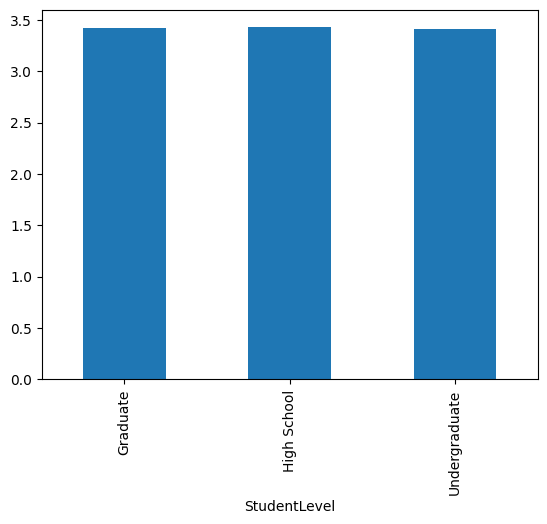

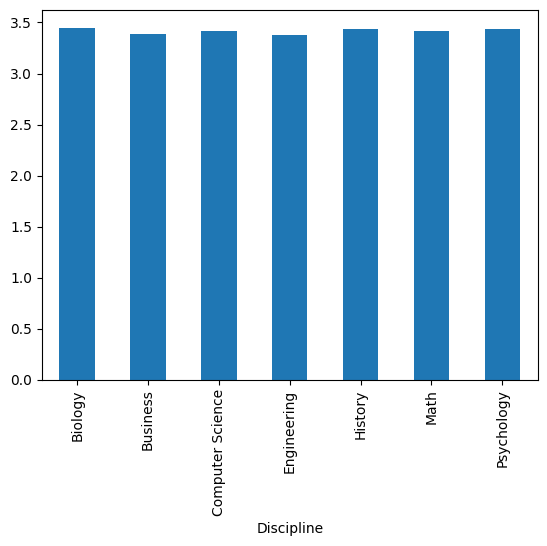

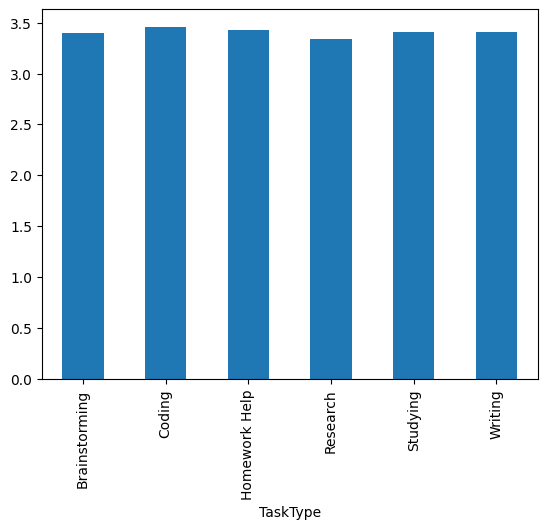

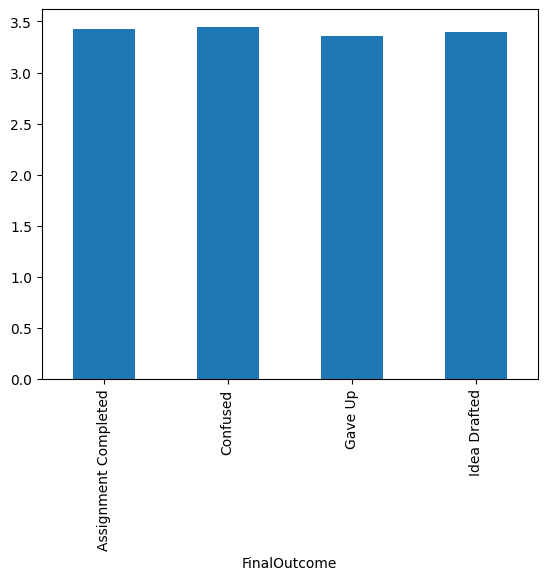

In [5]:
## Visualizing the Categorical Columns relationship with Satisfaction Rating
cat = Student_Data.select_dtypes(exclude = ['int', float])

for i in cat:
    if i != 'SatisfactionRating':
        Student_Data.groupby([i])['SatisfactionRating'].mean().plot.bar()
        plt.show()

As we can see, the average satisfaction rating varies very little across StudentLevel, Dicipline, TaskType, FinalOutcome

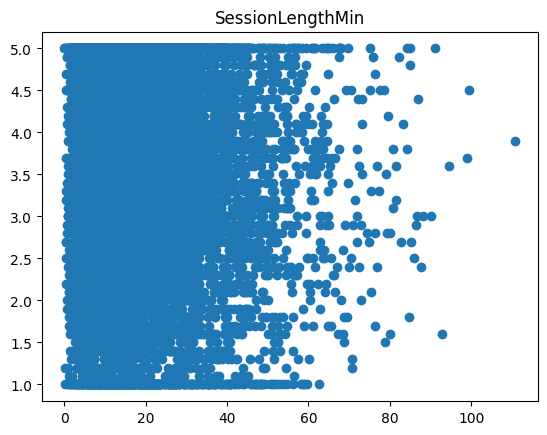

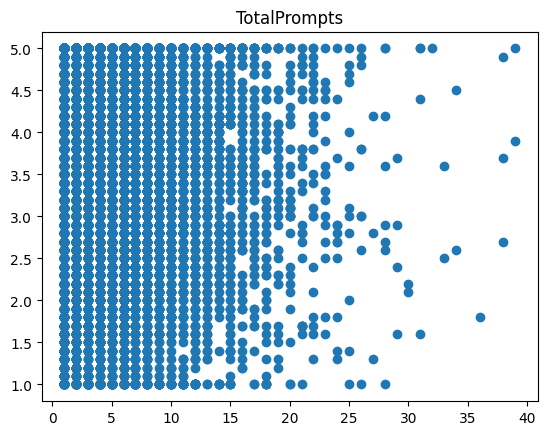

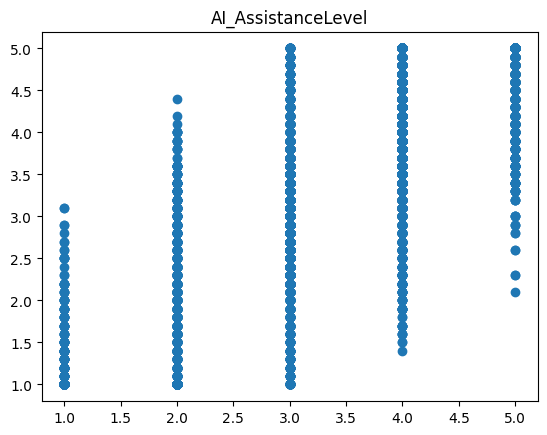

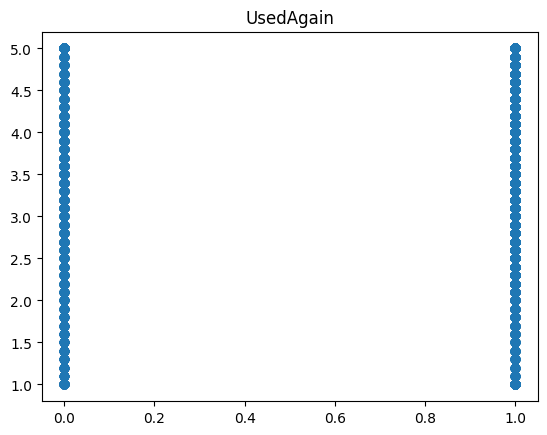

In [6]:
## Visualizing the Numerical Columns relationship with Satisfaction Rating
num = Student_Data.select_dtypes(exclude = ['object'])

for i in num:
    if i != 'SatisfactionRating':
        plt.scatter(Student_Data[i], Student_Data['SatisfactionRating'])
        plt.title(i)
        plt.show()

As we can see, it is almost impossible to gain any useful insigts just from the above graphs. There is a slight trend where Satisfaction goes up with higher AI Assistance Levels, but other than that no trends emerge.

All of these graphics show that no one feature has a heavy impact on Student Satisfaction, or even a noticible one. This will make predicitng SatisfactionLevel difficult, however we shall attempt it regardless.

### Finding Outliers

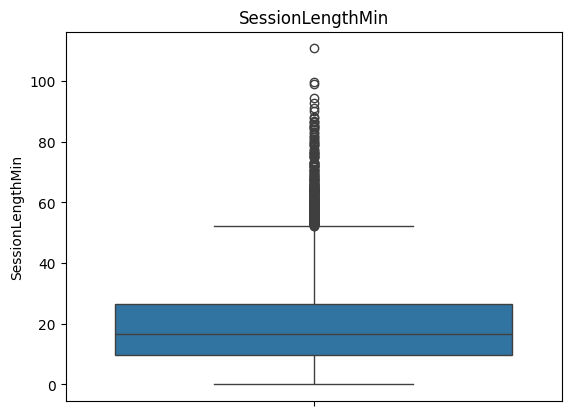

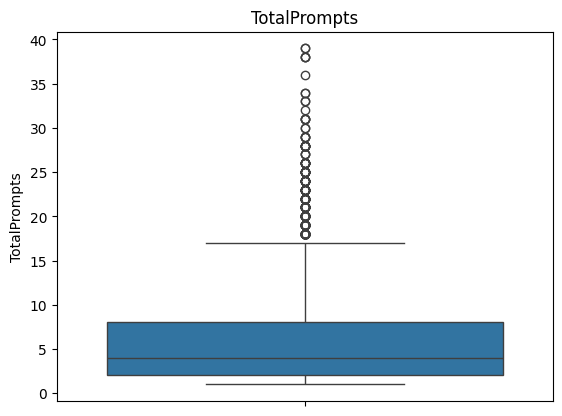

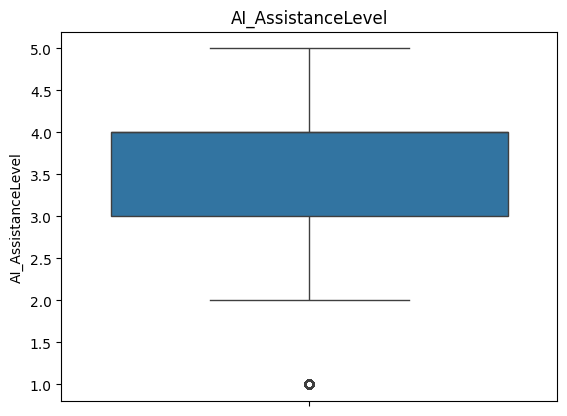

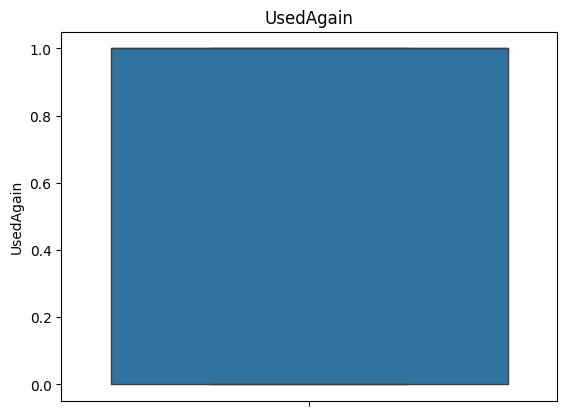

In [7]:
for i in num:
    if i != 'SatisfactionRating':
        sns.boxplot(Student_Data[i])
        plt.title(i)
        plt.show()

As we can see there are many outliers in SessionLength and Total Prompts, which will need to be handled. Assitance Level also has outliers, however that is due to the major data imbalance between the values, so these outliers will be handled differently.

### Feature Engineering

In [21]:
## Encoding categorical features as numerical for model usage

Model_Data = Student_Data.copy()

## Using Factorize instead of replace because replace could cause errors in future versions of Pandas.

codes, uniques = pd.factorize(Model_Data['StudentLevel']) ## 0 = Undergraduate, 1 = High School, 2 = Graduate
Model_Data['StudentLevel'] = codes

codes, uniques = pd.factorize(Model_Data['Discipline']) ## 0 = Computer Science, 1 = Psychology, 2 = Business, 3 = Biology, 4 = Math, 5 = History, 6 = Engineering
Model_Data['Discipline'] = codes

codes, uniques = pd.factorize(Model_Data['TaskType']) ## 0 = Studying, 1 = Coding, 2 = Writing, 3 = Brainstorming, 4 = Homework Help, 5 = Research
Model_Data['TaskType'] = codes

codes, uniques = pd.factorize(Model_Data['FinalOutcome']) ## 0 = Assignment Completed, 1 = Idea Drafted, 2 = Confused, 3 = Gave Up
Model_Data['FinalOutcome'] = codes

Model_Data

,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,0,0,31.20,11,0,2,0,1,1.0
1,0,1,13.09,6,0,3,0,1,2.0
2,0,2,19.22,5,1,3,0,1,3.3
3,0,0,3.70,1,1,3,0,1,3.5
4,0,1,28.12,9,2,3,0,1,2.9
...,...,...,...,...,...,...,...,...,...
9995,0,1,28.41,5,0,3,0,1,4.2
9996,2,2,13.98,6,2,5,0,1,5.0
9997,0,3,10.78,2,0,3,1,1,3.5
9998,0,2,30.88,7,2,3,0,0,4.3


In [9]:
Model_Data.corr()

,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
StudentLevel,1.000000,-0.000923,0.013699,0.010886,0.002365,-0.003705,0.009976,0.006014,0.004821
Discipline,-0.000923,1.000000,0.004336,0.003400,0.009395,0.004473,-0.001558,0.001177,-0.004055
SessionLengthMin,0.013699,0.004336,1.000000,0.902317,0.016682,-0.006848,0.008562,0.004908,-0.011136
TotalPrompts,0.010886,0.003400,0.902317,1.000000,0.018264,-0.006355,0.006775,0.006690,-0.009561
TaskType,0.002365,0.009395,0.016682,0.018264,1.000000,-0.001153,0.035654,-0.020911,-0.005761
AI_AssistanceLevel,-0.003705,0.004473,-0.006848,-0.006355,-0.001153,1.000000,-0.010273,-0.010005,0.775513
FinalOutcome,0.009976,-0.001558,0.008562,0.006775,0.035654,-0.010273,1.000000,-0.326288,-0.009697
UsedAgain,0.006014,0.001177,0.004908,0.006690,-0.020911,-0.010005,-0.326288,1.000000,-0.009353
SatisfactionRating,0.004821,-0.004055,-0.011136,-0.009561,-0.005761,0.775513,-0.009697,-0.009353,1.000000


As we saw Satisfaction ratings graphics, the only feature that has a strong relationship with SatisfactionRating is AI_AssistanceLevel. It is still possible that some of these features have a correlation with SatisfactionRating that is simply not shown through pairwise correlation.

### Model Building

In [152]:
Model_Data = Model_Data ## Reset Model_Data for easier process averaging accuracies.

In [153]:
unrefined_model = []
outliers_removed_model = []
sample_weight_model = []
outlier_weight_model = []

In [10]:
## Session Length and Total Prompts Outlier removal
## It does not make much since to drop the outliers, as they are not an error, and as testing shows do not strongly effect model preformance.

#drop_rows = Model_Data[Model_Data['SessionLengthMin'] > 50].index
#Model_Data.drop(drop_rows)

#drop_rows = Model_Data[Model_Data['TotalPrompts'] > 17].index
#Model_Data.drop(drop_rows)

#print("Dropped")

In [11]:
from sklearn.model_selection import train_test_split

X = Model_Data.drop(['SatisfactionRating'], axis=1)
y = Model_Data['SatisfactionRating']

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import r2_score, accuracy_score

In [13]:
for i in range(100):

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

    lr = LinearRegression()

    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train) ## Handling Data Imbalance through sample wieghts

    lr.fit(X_train, y_train, sample_weight = sample_weights)

    pred = lr.predict(X_test)

    #unrefined_model.append(r2_score(y_test,pred))
    #outliers_removed_model.append(r2_score(y_test,pred))
    #sample_weight_model.append(r2_score(y_test,pred))
    #outlier_weight_model.append(r2_score(y_test,pred))

In [164]:
average_unrefined_acc = sum(unrefined_model) / len(unrefined_model)
average_outlier_acc = sum(outliers_removed_model) / len(outliers_removed_model)
average_weight_acc = sum(sample_weight_model) / len(sample_weight_model)
average_outlier_weight_acc = sum(outlier_weight_model) / len(outlier_weight_model)

print("Average Unrefined: " + str(average_unrefined_acc))
print("Average Outlier Removed: " + str(average_outlier_acc))
print("Average Sample Weight: " + str(average_weight_acc))
print("Average Outlier Sample Weight: " + str(average_outlier_weight_acc))

Average Unrefined: 0.5993023465232321
Average Outlier Removed: 0.5993046428852421
Average Sample Weight: 0.5799016688885684
Average Outlier Sample Weight: 0.5814089166740465


### Results

As we can see from the models' average R2 scores:

The Unrefined Model, with no outliers removed and no sample weights used to deal with data imbalance, has about a 60% accuracy.

The Outlier Removed Model, with the Session Length and Total Prompt outliers removed, also has about a 60% accuracy.

The Sample Weighted Model, where sample weights were used to attempt to handle data imbalance in AI_AssistanceLevel (the most important feature), has about a 58% accuracy, noticibly lower than the other two models.

The Sample Weighted with Outliers Removed Model, has about a 58% accuracy, about the same as the Sample Weighted Model

All of this tells us that trying to balance the data is actually leading to a decrease in model accuracy, liekly because the model is no longer accuratly accounting for the majority values in AI_Assitance Level. With AI_Assitance level being the only feature with high correlation to the target, it would be very difficult to get a much higher accuracy, since the model has very little important information to go on.

## Predicting a Students Likelyhood of Reusing the AI

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [18]:
Model_Data.corr()

,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
StudentLevel,1.000000,-0.000923,0.013699,0.010886,0.002365,-0.003705,0.009976,0.006014,0.004821
Discipline,-0.000923,1.000000,0.004336,0.003400,0.009395,0.004473,-0.001558,0.001177,-0.004055
SessionLengthMin,0.013699,0.004336,1.000000,0.902317,0.016682,-0.006848,0.008562,0.004908,-0.011136
TotalPrompts,0.010886,0.003400,0.902317,1.000000,0.018264,-0.006355,0.006775,0.006690,-0.009561
TaskType,0.002365,0.009395,0.016682,0.018264,1.000000,-0.001153,0.035654,-0.020911,-0.005761
AI_AssistanceLevel,-0.003705,0.004473,-0.006848,-0.006355,-0.001153,1.000000,-0.010273,-0.010005,0.775513
FinalOutcome,0.009976,-0.001558,0.008562,0.006775,0.035654,-0.010273,1.000000,-0.326288,-0.009697
UsedAgain,0.006014,0.001177,0.004908,0.006690,-0.020911,-0.010005,-0.326288,1.000000,-0.009353
SatisfactionRating,0.004821,-0.004055,-0.011136,-0.009561,-0.005761,0.775513,-0.009697,-0.009353,1.000000


Much like when we tried to select feature to use when predicting Satisfaction Rating, the features of the dataset have very little correlation with UsedAgain. Final outcome has the most correlation, but even that correlation is relativly low. We will be cutting the features: Discipline, SessionLengthMin, and TotalPrompts. These features have the least correlation and it prevents any issues with outliers invovling the latter two features.

### Initial Model

In [22]:
Model_Data.drop(columns=['Discipline','SessionLengthMin','TotalPrompts'], inplace=True)
display(Model_Data)

,StudentLevel,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,0,0,2,0,1,1.0
1,0,0,3,0,1,2.0
2,0,1,3,0,1,3.3
3,0,1,3,0,1,3.5
4,0,2,3,0,1,2.9
...,...,...,...,...,...,...
9995,0,0,3,0,1,4.2
9996,2,2,5,0,1,5.0
9997,0,0,3,1,1,3.5
9998,0,2,3,0,0,4.3


In [23]:
X = Model_Data.drop(['UsedAgain'], axis = 1)
y = Model_Data['UsedAgain']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train).score(X_test, y_test)

0.6623333333333333

In [75]:
preds = clf.predict(X_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43       895
           1       0.76      0.76      0.76      2105

    accuracy                           0.66      3000
   macro avg       0.60      0.60      0.60      3000
weighted avg       0.66      0.66      0.66      3000



We can see that on average, this unrefined Decision tree model has around a 66% accuracy. While the model does fairly well predicting true outcomes, it does poorly when predicting false, only correctly predicting false 42% of the time and only having 40% of its predicition be correct.

### Balancing Data

We will try three different data balancing methods: Undersampling, Oversampling, and NearMiss.

In [65]:
## Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
clf.fit(X_resampled, y_resampled).score(X_test, y_test)

0.565

In [66]:
preds = clf.predict(X_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.60      0.35      0.44      1482
           1       0.55      0.77      0.64      1518

    accuracy                           0.56      3000
   macro avg       0.58      0.56      0.54      3000
weighted avg       0.58      0.56      0.54      3000



We can see, that when using undersampling, the model overall got less accurate, with around a 56% accuracy. While some metrics increased, like precision when predicitng false, other metrics, like precision when predicting true, dropped just as much. clearly undersampling is not the best way to balance the data.

In [58]:
## Oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
clf.fit(X_resampled, y_resampled).score(X_test, y_test)

0.6123333333333333

In [59]:
preds = clf.predict(X_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.46      0.36      0.41      1092
           1       0.67      0.76      0.71      1908

    accuracy                           0.61      3000
   macro avg       0.57      0.56      0.56      3000
weighted avg       0.60      0.61      0.60      3000



We can see that, while oversampling with around 61% accuracy, was better than undersampling, it is still worse than the original model.

In [63]:
## Near Miss
from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X, y)
clf.fit(X_resampled, y_resampled).score(X_test, y_test)

0.49966666666666665

In [64]:
preds = clf.predict(X_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.71      0.33      0.45      1872
           1       0.41      0.78      0.54      1128

    accuracy                           0.50      3000
   macro avg       0.56      0.56      0.50      3000
weighted avg       0.60      0.50      0.48      3000



We can see that NearMiss is the worst of our three options with only around a 50% accuracy. While it does become much more precise with it False classification, its recall also goes down, and its yes classification are the least precise so far. 

Overall, attempts to balance the data have done more harm than good, so we will be sticking with the original model.

### Hyperparameter Tuning

In [79]:
params = {'criterion':['gini', 'entropy'], 
         'splitter': ['best', 'random'],
         'max_depth': np.linspace(5,90,18).astype(int),
         'min_samples_split': np.arange(2,10),
         'max_features': ['sqrt', 'log2']}

## Using randomized search to find the best parameters
rand_search = RandomizedSearchCV(DecisionTreeClassifier(), params, scoring='accuracy', cv=5)

rand_search.fit(X_train, y_train)

rand_params = rand_search.best_params_
print(rand_params, '\n')
print('Train Acc', rand_search.best_score_)
preds = rand_search.predict(X_test)
print('Test Acc', accuracy_score(preds, y_test))

{'splitter': 'best', 'min_samples_split': np.int64(6), 'max_features': 'sqrt', 'max_depth': np.int64(10), 'criterion': 'gini'} 

Train Acc 0.7202857142857143
Test Acc 0.727


In [80]:
max_depth = np.arange(rand_params['max_depth']-3,rand_params['max_depth']+3 )

min_samples_split = np.arange(rand_params['min_samples_split']-3, rand_params['min_samples_split']+3)

params = {'criterion':[rand_params['criterion']], 
         'splitter': [rand_params['splitter']],
         'max_depth': max_depth[max_depth>=2],
         'min_samples_split': min_samples_split[min_samples_split>=2],
         'max_features': [rand_params['max_features']]}


## Using grid search to test the new parameters
grid_search = GridSearchCV(DecisionTreeClassifier(), params, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

grid_params = grid_search.best_params_
print(grid_params, '\n')
print('Train Acc', grid_search.best_score_)
preds = grid_search.predict(X_test)
print('Test Acc', accuracy_score(preds, y_test))

{'criterion': 'gini', 'max_depth': np.int64(7), 'max_features': 'sqrt', 'min_samples_split': np.int64(5), 'splitter': 'best'} 

Train Acc 0.7435714285714285
Test Acc 0.7363333333333333


In [81]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.43      0.58      0.49       671
           1       0.86      0.78      0.82      2329

    accuracy                           0.74      3000
   macro avg       0.65      0.68      0.66      3000
weighted avg       0.77      0.74      0.75      3000



### Results

We can see that with hyperparameter tuning, the accuracy of the model goes from about 66% to about 74%, with some variation due to randomness. We can see that while precision on False did not get bettwer, the recall did improve meaning it predicted actual instances of False more accuratly. When predicting instances of True, the model got overall better with higher precision and recall. 

Overall, given the low correlation of the data, a 74% accuracy is not terrible, but it also isn't much better than guessing True every time.